### Emerging Technologies Project 2020/21
**Charlie Conneely, G00348887**
***
**Task**: Build a model based off of the `powerproduction` dataset, which can be used to predict power values based on input speed values. 

In [10]:
# Arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Parsing
import pandas as pd

# Neural networks.
import tensorflow.keras as kr

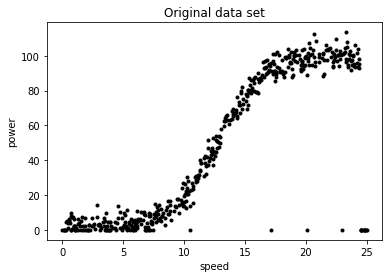

In [11]:
dataset = pd.read_csv("powerproduction.txt")

plt.title('Original data set')
plt.xlabel('speed')
plt.ylabel('power')
plt.plot(dataset.values[:,0], dataset.values[:,1], 'k.')
plt.show()

<br></br>
Below, I created a neural network with two neurons. I then trained the neural network with the data from the `powerproduction` dataset.

In [12]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(25, input_shape=(1,), activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))
model.add(kr.layers.Dense(25, input_shape=(1,), activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

# Train the neural network on our training data.
model.fit(dataset['speed'], dataset['power'], epochs=500, batch_size=10);

Epoch 1/500
500/500 [==============================] - 0s 526us/sample - loss: 2231.6528
Epoch 2/500
500/500 [==============================] - 0s 201us/sample - loss: 2183.0897
Epoch 3/500
500/500 [==============================] - 0s 194us/sample - loss: 2139.0094
Epoch 4/500
500/500 [==============================] - 0s 195us/sample - loss: 2097.9938
Epoch 5/500
500/500 [==============================] - 0s 195us/sample - loss: 2061.3081
Epoch 6/500
500/500 [==============================] - 0s 211us/sample - loss: 2025.7053
Epoch 7/500
500/500 [==============================] - 0s 216us/sample - loss: 1994.9908
Epoch 8/500
500/500 [==============================] - 0s 199us/sample - loss: 1966.1802
Epoch 9/500
500/500 [==============================] - 0s 205us/sample - loss: 1939.9033
Epoch 10/500
500/500 [==============================] - 0s 191us/sample - loss: 1915.3582
Epoch 11/500
500/500 [==============================] - 0s 218us/sample - loss: 1869.7229
Epoch 12/500
500/50

500/500 [==============================] - 0s 168us/sample - loss: 263.4264
Epoch 93/500
500/500 [==============================] - 0s 176us/sample - loss: 262.3684
Epoch 94/500
500/500 [==============================] - 0s 181us/sample - loss: 261.7344
Epoch 95/500
500/500 [==============================] - 0s 208us/sample - loss: 260.7481
Epoch 96/500
500/500 [==============================] - 0s 171us/sample - loss: 259.8914
Epoch 97/500
500/500 [==============================] - 0s 174us/sample - loss: 259.3917
Epoch 98/500
500/500 [==============================] - 0s 193us/sample - loss: 258.5428
Epoch 99/500
500/500 [==============================] - 0s 171us/sample - loss: 257.7642
Epoch 100/500
500/500 [==============================] - 0s 197us/sample - loss: 257.2702
Epoch 101/500
500/500 [==============================] - 0s 181us/sample - loss: 256.7271
Epoch 102/500
500/500 [==============================] - 0s 180us/sample - loss: 256.4136
Epoch 103/500
500/500 [========

500/500 [==============================] - 0s 186us/sample - loss: 250.5277
Epoch 184/500
500/500 [==============================] - 0s 223us/sample - loss: 250.2967
Epoch 185/500
500/500 [==============================] - 0s 175us/sample - loss: 250.5469
Epoch 186/500
500/500 [==============================] - 0s 183us/sample - loss: 250.3229
Epoch 187/500
500/500 [==============================] - 0s 180us/sample - loss: 250.5290
Epoch 188/500
500/500 [==============================] - 0s 186us/sample - loss: 250.2795
Epoch 189/500
500/500 [==============================] - 0s 221us/sample - loss: 250.3564
Epoch 190/500
500/500 [==============================] - 0s 170us/sample - loss: 250.3799
Epoch 191/500
500/500 [==============================] - 0s 199us/sample - loss: 250.6240
Epoch 192/500
500/500 [==============================] - 0s 206us/sample - loss: 250.6632
Epoch 193/500
500/500 [==============================] - 0s 217us/sample - loss: 250.9669
Epoch 194/500
500/500 [=

500/500 [==============================] - 0s 189us/sample - loss: 250.6867
Epoch 275/500
500/500 [==============================] - 0s 194us/sample - loss: 250.2195
Epoch 276/500
500/500 [==============================] - 0s 173us/sample - loss: 250.0441
Epoch 277/500
500/500 [==============================] - 0s 181us/sample - loss: 250.2159
Epoch 278/500
500/500 [==============================] - 0s 184us/sample - loss: 250.2025
Epoch 279/500
500/500 [==============================] - 0s 180us/sample - loss: 250.7597
Epoch 280/500
500/500 [==============================] - 0s 183us/sample - loss: 250.2340
Epoch 281/500
500/500 [==============================] - 0s 185us/sample - loss: 250.2343
Epoch 282/500
500/500 [==============================] - 0s 196us/sample - loss: 250.0850
Epoch 283/500
500/500 [==============================] - 0s 183us/sample - loss: 250.4158
Epoch 284/500
500/500 [==============================] - 0s 192us/sample - loss: 250.1846
Epoch 285/500
500/500 [=

500/500 [==============================] - 0s 180us/sample - loss: 250.5922
Epoch 366/500
500/500 [==============================] - 0s 176us/sample - loss: 250.5962
Epoch 367/500
500/500 [==============================] - 0s 184us/sample - loss: 249.9502
Epoch 368/500
500/500 [==============================] - 0s 172us/sample - loss: 250.0782
Epoch 369/500
500/500 [==============================] - 0s 184us/sample - loss: 250.0386
Epoch 370/500
500/500 [==============================] - 0s 180us/sample - loss: 250.2057
Epoch 371/500
500/500 [==============================] - 0s 196us/sample - loss: 249.9599
Epoch 372/500
500/500 [==============================] - 0s 195us/sample - loss: 250.1361
Epoch 373/500
500/500 [==============================] - 0s 187us/sample - loss: 250.0225
Epoch 374/500
500/500 [==============================] - 0s 183us/sample - loss: 249.9847
Epoch 375/500
500/500 [==============================] - 0s 186us/sample - loss: 250.1208
Epoch 376/500
500/500 [=

500/500 [==============================] - 0s 197us/sample - loss: 250.0384
Epoch 457/500
500/500 [==============================] - 0s 204us/sample - loss: 249.8478
Epoch 458/500
500/500 [==============================] - 0s 185us/sample - loss: 250.3305
Epoch 459/500
500/500 [==============================] - 0s 197us/sample - loss: 250.0210
Epoch 460/500
500/500 [==============================] - 0s 195us/sample - loss: 249.9004
Epoch 461/500
500/500 [==============================] - 0s 198us/sample - loss: 249.9833
Epoch 462/500
500/500 [==============================] - 0s 190us/sample - loss: 250.0069
Epoch 463/500
500/500 [==============================] - 0s 193us/sample - loss: 250.0841
Epoch 464/500
500/500 [==============================] - 0s 210us/sample - loss: 250.2571
Epoch 465/500
500/500 [==============================] - 0s 189us/sample - loss: 249.8059
Epoch 466/500
500/500 [==============================] - 0s 186us/sample - loss: 250.0420
Epoch 467/500
500/500 [=

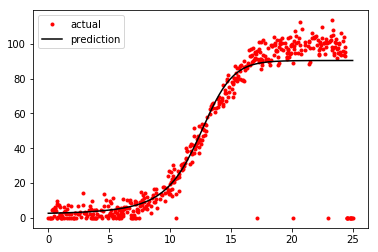

In [14]:
# Plot Model against dataset
plt.plot(dataset['speed'], dataset['power'], 'r.', label='actual')
plt.plot(dataset['speed'], model.predict(dataset['speed']), color='k', label='prediction')
plt.legend();

In [19]:
"""
Actual data - [15.591,81.239]
              [24.750, 0.000]
              [11.987,47.268]
"""
model.predict([15.591, 24.750, 11.987])

array([[83.92623],
       [90.43807],
       [40.84054]], dtype=float32)

<br></br>
The below evaluation confirms a loss of around **250**. <br>
This level of inaccuracy is mainly as a result of mulitple outliers (high speed values which result in a power of 0). <br>
Whether these readings represent expected output from a properly functioning wind turbine or inaccuracies is unclear. 

In [20]:
model.evaluate(dataset['speed'], dataset['power'])

500/500 [==============================] - 0s 38us/sample - loss: 249.9739


249.97389526367186

In [21]:
# Save model for server.py
model.save('model.h5')

***
**References:**
* Pandas.pydata.org; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
* Keras.io; https://keras.io/guides/sequential_model/
* Tensorflow.org; https://www.tensorflow.org/api_docs/python/tf/keras/models#functions